<a href="https://colab.research.google.com/github/sushily1997/Project_1/blob/main/Capstone_Project_1_Propensity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Description**

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.



##**Project Title :Reviewing customers past and on that Predict potential customrs who can buy our service.**

**Problem Description**

we have large number of customers. our sales team would like to call potential customers who can buy our service. We don't have enough manpower and time to call reach every customer and convince them for our products. Also we need to rank customers so that we could offer them our product and services with discounted price.

###**Attribute Information:**

This dataframe contains 8 variables that correspond to:

* **InvoiceNo** Invoice number. **Nominal**, a six digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation**

*  **StockCode** Product (item) code. **Nominal**, a five digit integral number uniquely assigned to each distinct product

* **Description** Product (item) name. **Nominal**

* **Quantity** The quantities of each product (item) per transaction. **Numeric**

* **InvoiceDate** Invoice Date and time.**Numeric**, the day and time when each transaction was generated

* **UnitPrice** Unit price. **Numeric**, product price per unit in sterling

* **CustomerID** Customer number. **Nominal**, a six digit integral number uniquely assigned to each customer

* **Country** Country name. **Nominal**, the name of the country where each customer resides




**Work Flow**

*   Customer segmentation.

*   Find Potential Vs Non Potential Customers.


*   Who Can Buy Our Services In Current Month. Prediction (Predicted Sales For Future).

*   Customer Lifetime Value (cltv) --Live vs Dead Customers.

*   Cohort Analysis.


*   Lifetime Pacakage -- --Recency , Frequency , Monetary Analysis.


   














In [2]:

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
from datetime import timedelta





**1. Data Overview**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%time
#load the dataset
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx', sheet_name='Online Retail')

CPU times: user 1min 14s, sys: 615 ms, total: 1min 15s
Wall time: 1min 17s


In [5]:
#shape of our dataset
print("The shape of our dataset is: ",df.shape)

The shape of our dataset is:  (541909, 8)


In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
#check the head of the dataset
print(f'The shape of the data is {df.shape}')
df.head(10)


The shape of the data is (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [8]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo, StockCode, Description, InvoiceDate and Country are Non-numeric Variables

Quantity, UnitPrice and CustomerID are numeric Variables

Our dataset is composed of **541909** rows and **8** columns. When going through the columns, we notice that we have some missing values in the **CustomerID** column, as it only has **406829** values. Also the column **Description** has missing values. So, that should be considered when applying exploration to our dataset.

--> Let's see what non-numeric variables and numeric variables differ in the description



In [10]:
#describe the non-numeric features
df.describe(exclude=['float64','int64']).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaT,NaT
StockCode,541909,4070,85123A,2313,NaT,NaT
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00
Country,541909,38,United Kingdom,495478,NaT,NaT


Through the description, there are some highlight we can discuss about:

There are some missing data at 'Description" feature
Unitied Kingdom domains the distribution of country feature( 495478 out of 541909)

In [11]:
#describe the  numeric fearture
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Highligh:

There are some missing values at CustomerID
Quantity and UnitPrice suppose to be the positive value, howerver they receive the negative value as min value. Those negative values should be remove Or it should be converted into positive we make this value positive value

**2. Data Cleaning: Checking for Null Values in msno Graph**

total number of obseration is: 541909


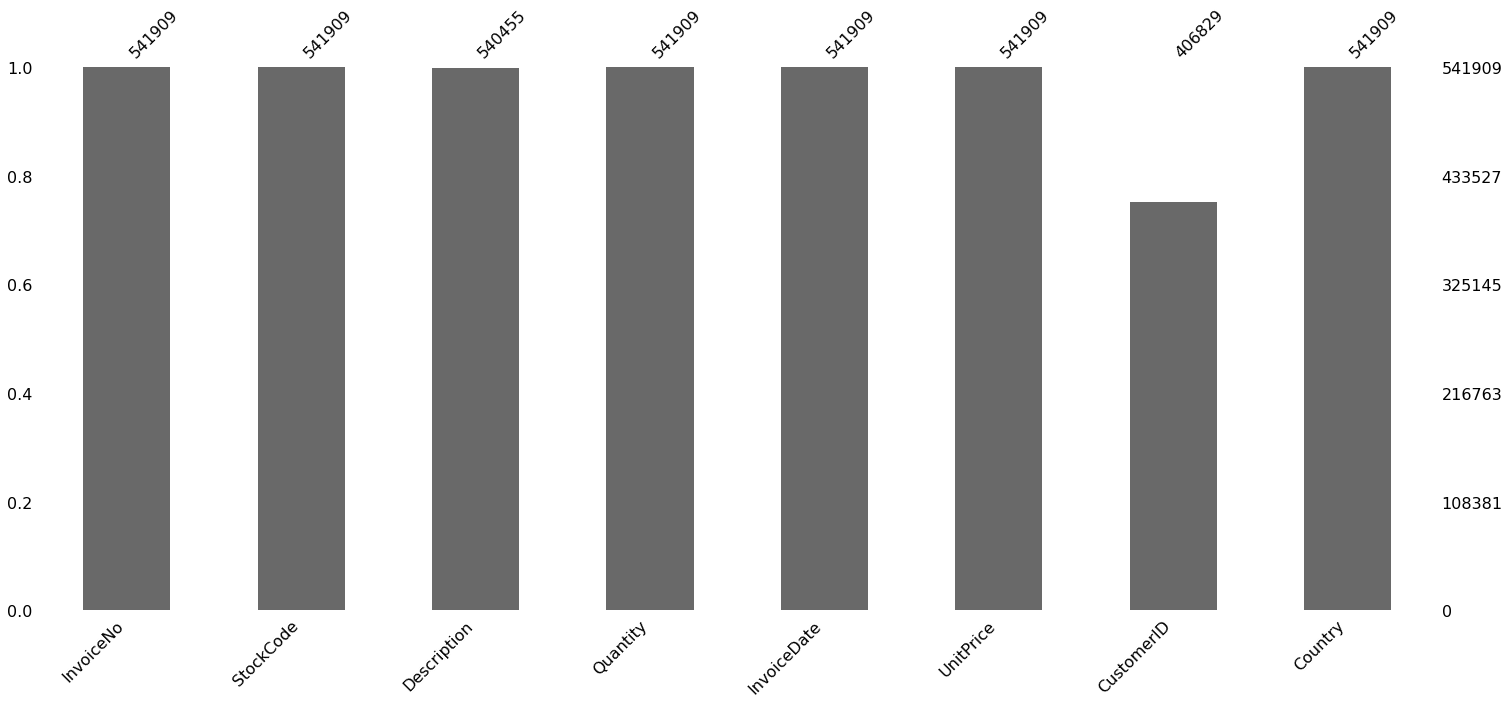

In [12]:
print ('total number of obseration is:',df.shape[0])
msno.bar(df)

We observed that CustomerID and Descriptive having missing data. We also can check the number of missing data using the below code:

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

I will delete all the missing data and then visualize the bar plot again

In [14]:
df.dropna(inplace =True)

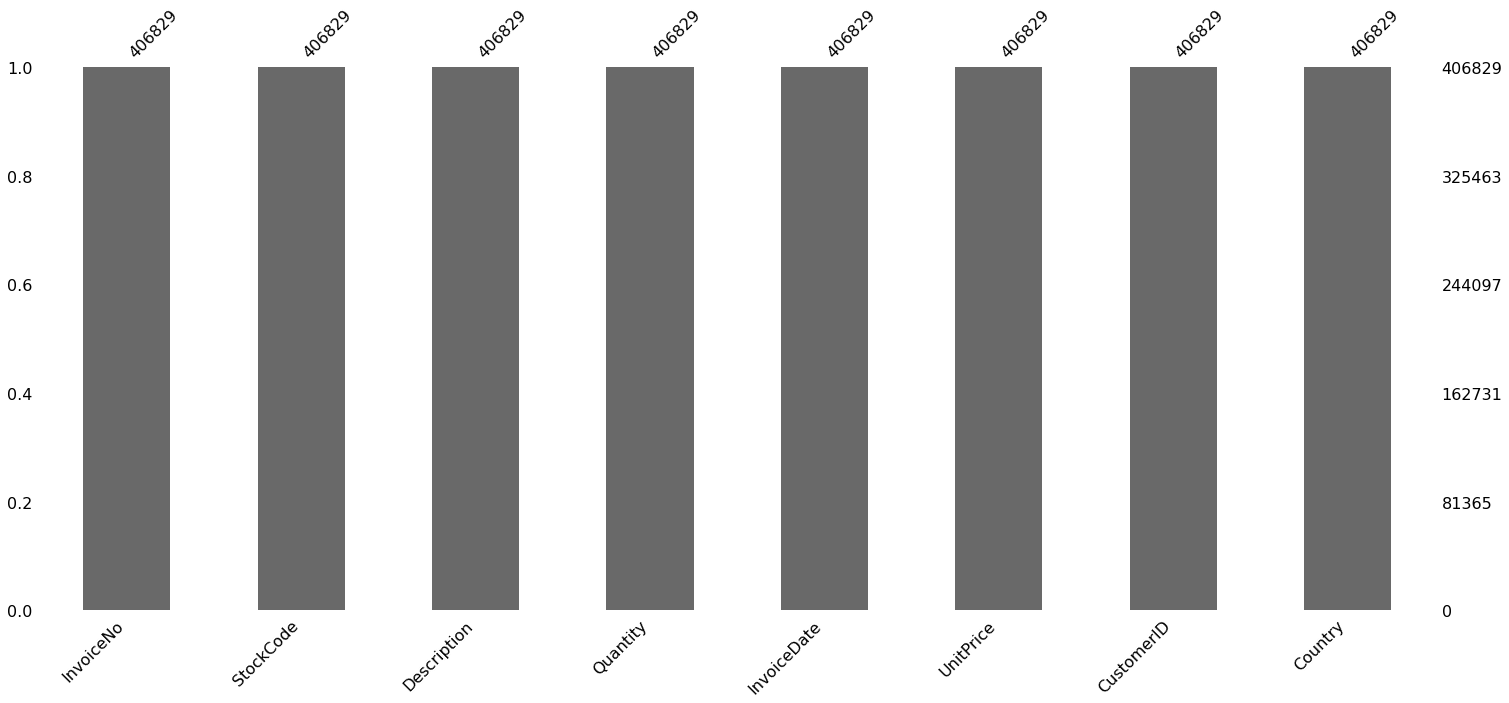

In [15]:
msno.bar(df)

In [16]:

df.shape

(406829, 8)

In [17]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [18]:
now = dt.date(2011,12,9)
print(f'Date of Reference: {now}')
df['Date'] = df['InvoiceDate'].apply(lambda x: x.date())

Date of Reference: 2011-12-09


create new column as Total_Price by multiplying Quantity and unit price values for each customer

In [19]:
df1=df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,54.08


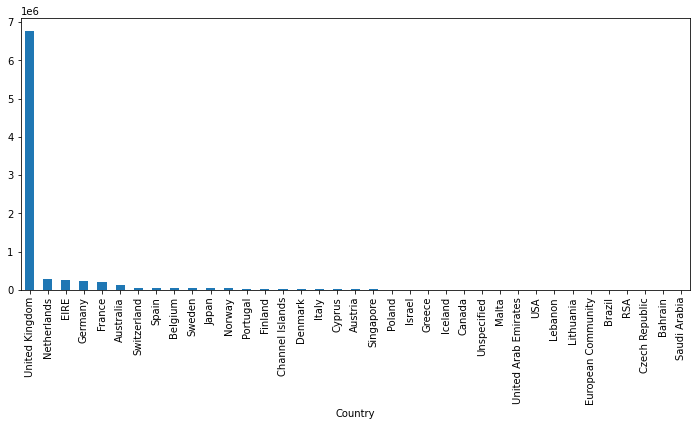

In [20]:
plt.figure(figsize=(12,5))
df.groupby("Country")["TotalCost"].sum().sort_values(ascending=False).plot(kind="bar")

In [23]:
#Checking the stats of all the columns
df.describe()

,Quantity,UnitPrice,CustomerID,TotalCost
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantities (with corresponding UnitPrice values) was returned or cancelled.


##**Verify Assumption: Cancelled invoices**

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our assumption is correct about the negative quantity: -80995.

We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [24]:
#get cancelled transactions
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96


In [25]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-09,-168469.6


As we expected, negative values in the Quantity column, mean that it's a cancelled quantity because we didn't find any positive value for orders where InvoiceNo contains the prefix C.

**How much cancelled orders do we have**

In [26]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders =df['InvoiceNo'].nunique()

We have  8905  cancelled orders.


In [27]:
#percentage of cancelled orders in total orders
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Percentage of orders canceled: 8905/22190 (40.13%) 


We have a large percentage of cancelled orders of 40%. Studying these cancelled orders may help in preventing future cancellation.





**Convertin Negative values to Positive Value in Dataset**

In [28]:
 
df['Quantity'] = df['Quantity'].abs()

df.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
141105,548499,48187,DOORMAT NEW ENGLAND,1,2011-03-31 13:47:00,7.95,17075.0,United Kingdom,2011-03-31,7.95
422548,573094,21534,DAIRY MAID LARGE MILK JUG,1,2011-10-27 14:39:00,4.95,15707.0,United Kingdom,2011-10-27,4.95
422547,573094,22635,CHILDS BREAKFAST SET DOLLY GIRL,1,2011-10-27 14:39:00,9.95,15707.0,United Kingdom,2011-10-27,9.95
325095,565431,20763,DAISY SKETCHBOOK,1,2011-09-04 13:15:00,3.75,14965.0,United Kingdom,2011-09-04,3.75
224631,556539,22605,WOODEN CROQUET GARDEN SET,1,2011-06-13 12:44:00,14.95,13589.0,United Kingdom,2011-06-13,14.95
...,...,...,...,...,...,...,...,...,...,...
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,2011-11-25,0.00
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,77183.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,-77183.60
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-09,-168469.60


In [29]:
df['TotalCost'] = df['TotalCost'].abs()

df.sort_values('TotalCost')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
446125,574879,22625,RED KITCHEN SCALES,2,2011-11-07 13:22:00,0.00,13014.0,United Kingdom,2011-11-07,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.00,14911.0,EIRE,2010-12-21,0.0
479546,577168,M,Manual,1,2011-11-18 10:42:00,0.00,12603.0,Germany,2011-11-18,0.0
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.00,16133.0,United Kingdom,2011-09-25,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom,2011-01-06,0.0
...,...,...,...,...,...,...,...,...,...,...
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,2011-06-10,38970.0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,77183.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,77183.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-09,168469.6


In [30]:
country_price=df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          4530411
Netherlands              201746
EIRE                     144721
Germany                  121078
France                   113096
Australia                 84765
Sweden                    36529
Switzerland               30388
Spain                     29078
Japan                     26814
Belgium                   23322
Norway                    19429
Portugal                  16200
Finland                   10742
Channel Islands            9503
Denmark                    8282
Italy                      8225
Cyprus                     6405
Singapore                  5248
Austria                    4935
Israel                     4102
USA                        3882
Poland                     3715
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1558
Malta                       996
United Arab Emirates        982
Czech Republic              750
Lithuania                   652


In [31]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

**What are the potatial areas of improvement for the business**

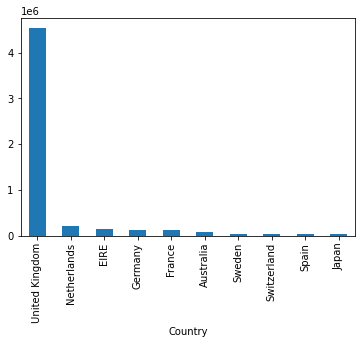

In [32]:
#Top 10 companies with high number of purchase
country_price[:10].plot(kind='bar')

The above graph shows the percentage of orders from the top 10 countries, sorted by the number of orders. This shows that more than 90% of orders are coming from United Kingdom and no other country even makes up 3% of the orders in the data.



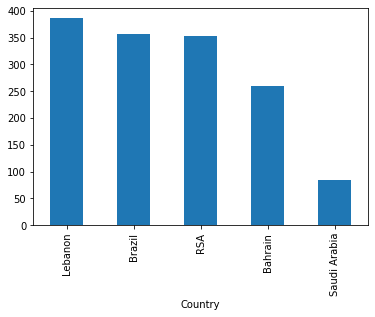

In [33]:
# 5 companies with least number of purchase
country_price[32:].plot(kind='bar')

In [34]:
#Adding year feature to the dataset
timest = df['InvoiceDate'].dt.year
df['Year'] = timest
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010


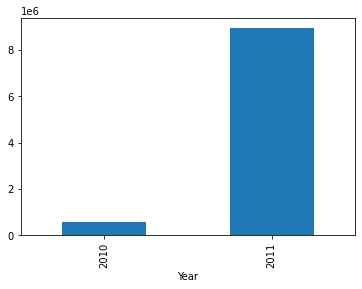

In [35]:
#Total sales for different years
df.groupby('Year')['TotalCost'].sum().plot(kind = 'bar')

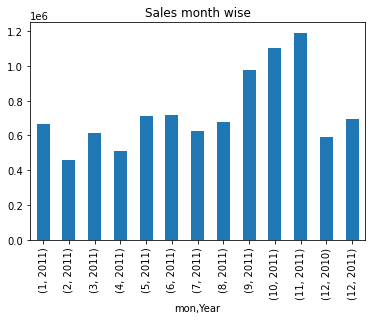

In [36]:
#Sales for different month
df['mon']=df['InvoiceDate'].dt.month
df['month']=df['InvoiceDate'].dt.month_name()
df.groupby(['mon','Year'])['TotalCost'].sum().plot(kind = 'bar', title = 'Sales month wise')

**Performance Analysis**

Sales Performance can be seen with

1.Number of sales every month

2.Number of sales every year

3.We see that in 2010 we have sales only for dec and in 2011 we have sales for all moths

4.We can see that from September to Novembor we have very good sales

In [76]:
#Adding year feature to the dataset
timest = df['InvoiceDate'].dt.year
df['Year'] = timest
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost,Year,mon,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010,12,December


In [38]:
## check recency last purchase date:
recency_df = df.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [39]:
## check recency first purchase date:
oldcust_df = df.groupby(by='CustomerID', as_index=False)['Date'].min()
oldcust_df.columns = ['CustomerID','FirstPurshaceDate']
oldcust_df['OldCust'] = oldcust_df['FirstPurshaceDate'].apply(lambda x: (now - x).days)
oldcust_df.drop('FirstPurshaceDate',axis=1,inplace=True)

oldcust_df.head()

,CustomerID,OldCust
0,12346.0,325
1,12347.0,367
2,12348.0,358
3,12349.0,18
4,12350.0,310





##**Explore Basket/Orders**

**a) What's the average number of orders per customer?**

In [40]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [41]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The average number of orders per customer is 5.

As we found in descriptive statistics that customers buy in average (mean) a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

**b) What's the average number of unique items per order?**

In [42]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [43]:
groupby_invoice.describe()

,productsNumber
count,22190.000000
mean,17.876566
std,22.872614
min,1.000000
25%,3.000000
50%,12.000000
75%,24.000000
max,541.000000


In [44]:
groupby_ID = pd.DataFrame(df.groupby('CustomerID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


In [45]:
groupby_ID.describe()

,Number of Items per Customer
count,4372.000000
mean,61.211116
std,85.425119
min,1.000000
25%,15.000000
50%,35.000000
75%,77.000000
max,1794.000000


As images speak more, let's see what the distribution of productsNumber tells us.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


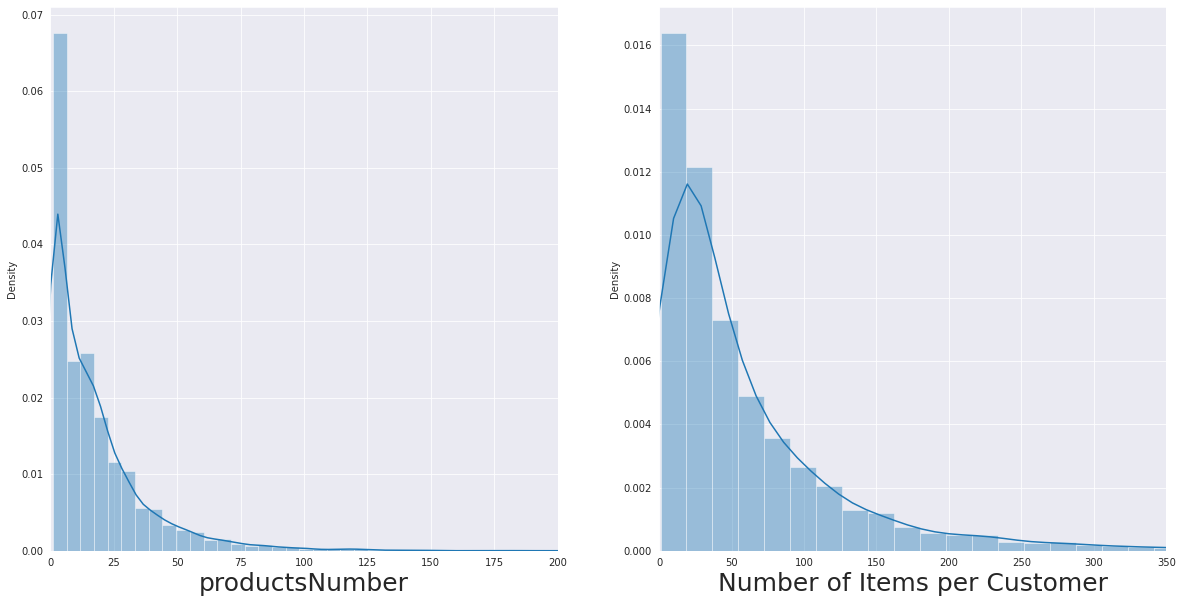

In [46]:
#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['productsNumber'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='productsNumber',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()


In [47]:
print('Number of transaction: ',df['InvoiceNo'].nunique())
print('Number of unique products: ',df['StockCode'].nunique())
print('Number of customers: ',df['CustomerID'].nunique())

Number of transaction:  22190
Number of unique products:  3684
Number of customers:  4372


In [48]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [49]:
#check small unit price in dataset
df.nsmallest(n=10, columns=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost,Year,mon,month
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,2010-12-05,0.0,2010,12,December
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,2010-12-16,0.0,2010,12,December
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,2010-12-21,0.0,2010,12,December
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011-01-06,0.0,2011,1,January
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011-01-06,0.0,2011,1,January
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,2011-01-13,0.0,2011,1,January
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,2011-02-10,0.0,2011,2,February
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,2011-03-23,0.0,2011,3,March
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,2011-03-30,0.0,2011,3,March
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,2011-04-04,0.0,2011,4,April


In [50]:
#check large unit price in dataset
df.nlargest(n=10, columns=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost,Year,mon,month
222681,C556445,M,Manual,1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,2011-06-10,38970.00,2011,6,June
173277,C551685,POST,POSTAGE,1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,2011-05-03,8142.75,2011,5,May
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,2011-05-03,8142.75,2011,5,May
173391,C551699,M,Manual,1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,2011-05-03,6930.00,2011,5,May
268027,C560372,M,Manual,1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,2011-07-18,4287.63,2011,7,July
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,2011-10-27,4161.06,2011,10,October
422375,C573079,M,Manual,2,2011-10-27 14:15:00,4161.06,12536.0,France,2011-10-27,8322.12,2011,10,October
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France,2011-10-27,4161.06,2011,10,October
406404,C571750,M,Manual,1,2011-10-19 11:16:00,3949.32,12744.0,Singapore,2011-10-19,3949.32,2011,10,October
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,2011-10-19,3949.32,2011,10,October


#**RFM analysis**

**Recency, frequency, monetary (RFM) segmentation**

RFM stands for Recency, Frequency, and Monetary.

RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

RFM analysis helps to answer the following questions: Who was our most recent customer? How many times has he purchased items from our shop? And what is the total value of his trade? All this information can be critical to understanding how good or bad a customer is to the company.

After getting the RFM values, a common practice is to create ‘quartiles’ on each of the metrics and assigning the required order.

Create Spend Column


In [51]:
# Let's observe the last transaction date.
# So we can determine the performans/measurement date for calculating how recent a customer's latest purchase was.

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [52]:
# Assign "performans_date" as 2 days after the last transaction date of purchase:

performans_date = df["InvoiceDate"].max() + timedelta(days=2)
performans_date

Timestamp('2011-12-11 12:50:00')

In [53]:
rfm_df = df.groupby("CustomerID").agg \
                                    ({"InvoiceDate" : lambda InvoiceDate :(performans_date - InvoiceDate.max()).days,  # Recency
                                     "InvoiceNo" : lambda InvoiceNo : InvoiceNo.nunique(),  # Frequency
                                     "TotalCost":  lambda TotalCost: TotalCost.sum()})    # Monetary

In [54]:
rfm_df.head()

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,327,2,154367.20
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,20,1,1757.55
12350.0,311,1,334.40


In [55]:
# Replace column names with Recency, Frequency and Monetary:

rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,327,2,154367.20
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,20,1,1757.55
12350.0,311,1,334.40


In [56]:
rfm_df.tail()

,Recency,Frequency,Monetary
CustomerID,,,
18280.0,279,1,180.60
18281.0,182,1,80.82
18282.0,9,3,179.50
18283.0,5,16,2094.88
18287.0,44,3,1837.28


**Assigning RFM Scores**

RFM analysis numerically scale each of these three categories for each customer 1 to 5. This is the higher the number, the better the result. The "Best" customer would receive a top score in every category whereas for Receny score, this is the opposite, because the most valueable customer is that has recently made purchasing so Recency score is labeled as 1.

The max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score should be given as 5 to represent best customers.

In [71]:
rfm_df["Recency_Score"]  = pd.qcut(rfm_df['Recency'], 5, [5, 4, 3, 2, 1])
rfm_df["Frequency_Score"]  = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
rfm_df["Monetary_Score"]  = pd.qcut(rfm_df['Monetary'], 5, [1, 2, 3, 4, 5])
rfm_df["RFM_SCORE"] = (rfm_df['Recency_Score'].astype(str) +
                    rfm_df['Frequency_Score'].astype(str))

rfm_df.head() 

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,12346.0,327,2,154367.20,1,2,5,12,Hibernating
1,12347.0,3,7,4310.00,5,4,5,54,Champions
2,12348.0,76,4,1797.24,2,3,4,23,At_Risk
3,12349.0,20,1,1757.55,4,1,4,41,Promising
4,12350.0,311,1,334.40,1,1,2,11,Hibernating


**Generating Segments Based on RFM Scores**

We can assign the segments by using Receny & Frequency Grid frequently seen in the literature.

In [72]:
rfm_df['Segment'] = rfm_df['RFM_SCORE']
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,12346.0,327,2,154367.20,1,2,5,12,12
1,12347.0,3,7,4310.00,5,4,5,54,54
2,12348.0,76,4,1797.24,2,3,4,23,23
3,12349.0,20,1,1757.55,4,1,4,41,41
4,12350.0,311,1,334.40,1,1,2,11,11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

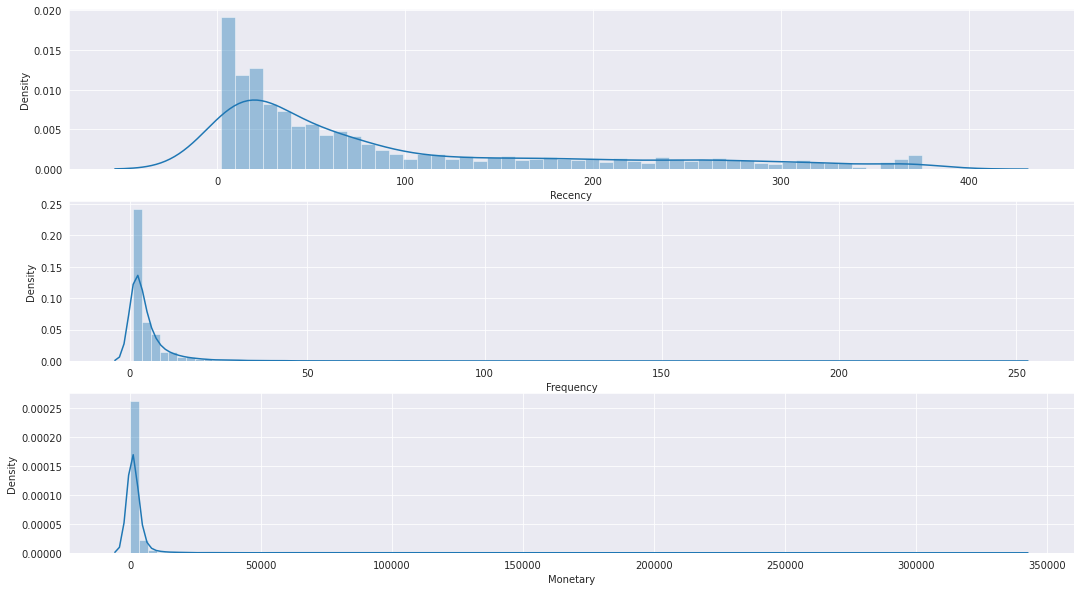

In [73]:
plt.figure(figsize=(18,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'],bins=50)

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'],bins=100)

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'],bins=100)

# Show the plot
plt.show()


As we can see from the above plots, all the variables do not have a symmetrical distribution. All of them are skewed to the right.






The log transformation cannot be used for negative values. One common practice one can use here is to add a constant value to get a positive value and this is generally taken as the absolute of the least negative value of the variable to each observation. However, in our data, we do not have any negative values since we are dealing with customer transactions dataset.

Min Value of every column > 0

Also, We also see that we do not get constant mean and standard deviation values.

In [60]:
rfm_df[['Recency', 'Frequency', 'Monetary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372.0,93.047118,100.765435,2.0,18.00,51.000,144.000,375.0
Frequency,4372.0,5.075480,9.338754,1.0,1.00,3.000,5.000,248.0
Monetary,4372.0,2178.122140,10502.255527,0.0,308.57,677.975,1696.285,336942.1


In [61]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_loose',
    r'3[1-2]': 'About_to_sleep',
    r'33': 'Need_attention',
    r'[3-4][4-5]': 'Loyal_customers',
    r'41': 'Promising',
    r'51': 'New_customers',
    r'[4-5][2-3]': 'Potential_loyalists',
    r'5[4-5]': 'Champions'
}

In [62]:
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)
rfm_df.reset_index(inplace=True)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,12346.0,327,2,154367.20,1,2,5,12,Hibernating
1,12347.0,3,7,4310.00,5,4,5,54,Champions
2,12348.0,76,4,1797.24,2,3,4,23,At_Risk
3,12349.0,20,1,1757.55,4,1,4,41,Promising
4,12350.0,311,1,334.40,1,1,2,11,Hibernating


In [63]:
rfm_df.groupby('Segment').agg({"CustomerID":"count"}).sort_values("CustomerID",ascending=False)

,CustomerID
Segment,
Hibernating,1058
Loyal_customers,811
Champions,645
At_Risk,607
Potential_loyalists,496
About_to_sleep,361
Need_attention,184
Promising,99
Cant_loose,70


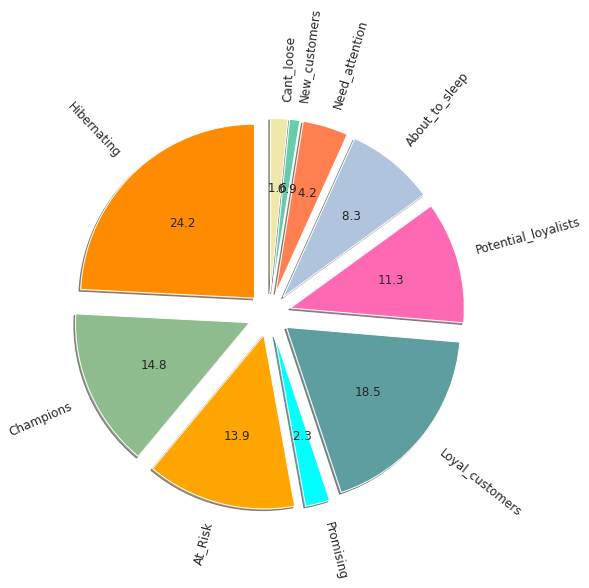

In [64]:
colors  = ("darkorange", "darkseagreen", "orange", "cyan", "cadetblue", "hotpink", "lightsteelblue", "coral",  "mediumaquamarine","palegoldenrod")
explodes = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

rfm_df["Segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");

**Build Marketing Strategies**

In [65]:
rfm_df[["Recency", "Frequency", "Monetary"]].agg(["mean"])

,Recency,Frequency,Monetary
mean,93.047118,5.07548,2178.12214


In [66]:
rfm_df[["Segment","Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean","median", "count","sum"])

Recency                       Frequency               \
                           mean median count     sum       mean median count   
Segment                                                                        
About_to_sleep        53.401662   54.0   361   19278   1.288089    1.0   361   
At_Risk              158.522241  142.0   607   96223   3.317957    3.0   607   
Cant_loose           132.771429  103.5    70    9294   9.771429    8.0    70   
Champions              6.387597    5.0   645    4120  14.753488    9.0   645   
Hibernating          217.993384  220.0  1058  230637   1.202268    1.0  1058   
Loyal_customers       33.057953   29.0   811   26810   8.032059    6.0   811   
Need_attention        50.260870   48.0   184    9248   2.625000    3.0   184   
New_customers          7.560976    8.0    41     310   1.000000    1.0    41   
Potential_loyalists   17.241935   18.0   496    8552   2.221774    2.0   496   
Promising             23.535354   24.0    99    2330   1.000000    1.0    99   

                              Monetary                               
                      sum         mean    median count          sum  
Segment                                                              
About_to_sleep        465   470.884404   329.680   361   169989.270  
At_Risk              2014  1224.868521   674.520   607   743495.192  
Cant_loose            684  2544.703714  2018.165    70   178129.260  
Champions            9516  7044.974884  2648.360   645  4544008.800  
Hibernating          1272   548.108271   283.495  1058   579898.551  
Loyal_customers      6514  2997.973269  1794.980   811  2431356.321  
Need_attention        483   795.969620   629.050   184   146458.410  
New_customers          41   374.067317   246.300    41    15336.760  
Potential_loyalists  1102  1378.931371   510.140   496   683949.960  
Promising              99   304.317879   228.910    99    30127.470

Now, let's focus on some segments which can be critically important for marketing strategies

***Champions***


***Loyal_customers***

***Cant_loose***

***Need_attention***

**Champions:**

This segment constitutes 15% of the customer portfolio and also it includes 645 customers who have made their last purchases within the last week and generate an average turnover of 6000 TL. Because of this segment consists of customers most frequently spends and can easily adopt to new products and services, cross-sales strategies can be taken for this segment.



**Loyal Customers:**

There are 818 customers in this segment, and while the purchasing frequency is 4 on average in all customer segments, it has been seen that average purchases are 2 times higher in this segment (average of frequency is 8). The average monetary value of this segment is 50% above the general average.

As a conclusion, in order to ensure customer loyalty sustainable, cross-sell communications in line with customer expectations and needs can be organized for this segment.

**Need_Attention:**

There are 184 customers that last purchased nearly 2 months ago in this segment. Although they dont make purchase frequently, total transaction amounts of these customers contribute to profitability.

As a result, Cashback and bonus campaigns can be organized for this segment to retain customers and even move them to a segment that makes more purchases. In fact, discounted product offers and campaigns based on gift coupons can be planned by observing habits of other customers with similar behaviors, and analyzing according product association rules.

**Can't_loose:**

Customers of Can't_Loose segment have a higher transaction frequency, even though their spending amounts are close to the loyal customer segment. However, since these customers are nearly lost customers that made last purchases nearly 4 months ago.

So, new campaign strategies based on rewards, discounts, and other special incentives as a way to attract and retain customers can be planned in order to make them feel special and loyal again.